In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Customer Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 ##  Changing the data type of TotalCharges and replacing null values with 0.

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",'0')

In [13]:
df['TotalCharges']= df['TotalCharges'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.duplicated().sum()

0

In [23]:
df['customerID'].duplicated().sum() # after chcking duplicate values in table alwasys check duplicate value in primary key column

0

## converted 0 and 1 values to no and yes in SeniorCitizen column to make it easier to understand 

In [25]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
    

In [27]:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


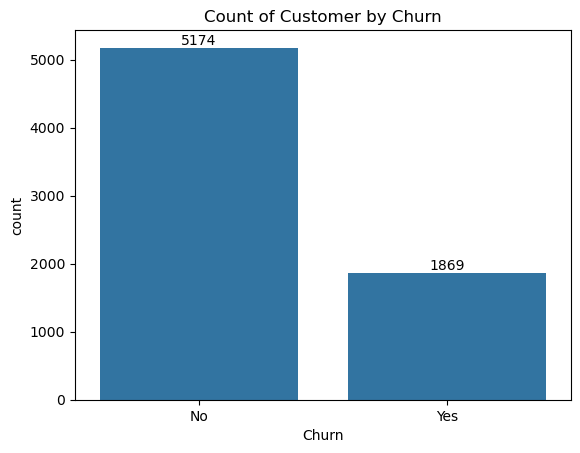

In [66]:
ax = sns.countplot(x='Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

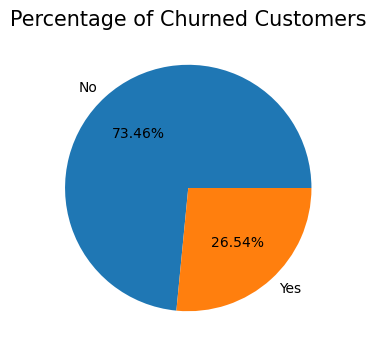

In [70]:
plt.figure(figsize=(4,4))
gb= df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize="15")
plt.show()


In [ ]:
#From the given pie chart we can conclude that 26.54 of our customer have churned out. Now lets find the reason behind it.

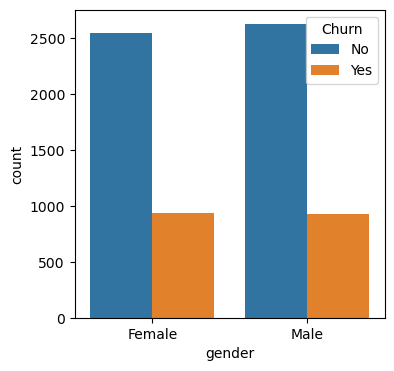

In [76]:
plt.figure(figsize=(4,4))
sns.countplot(x= "gender",data = df, hue = "Churn") # churn will basically differentiate the male and female customers from our customer
plt.title("Churn by Gender")
plt.show()

## Count of Customers by Senior Citizen

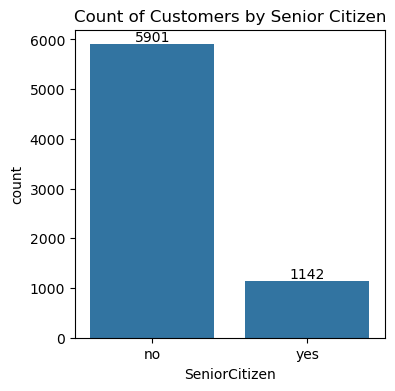

In [88]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen",data =df)
ax.bar_label(ax.containers [0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

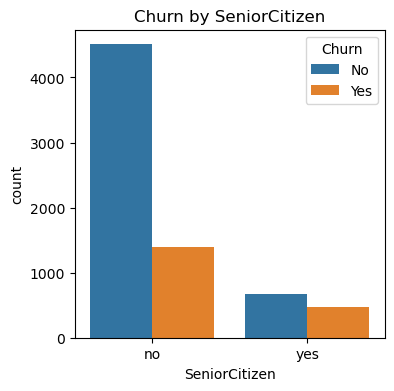

In [78]:
plt.figure(figsize=(4,4))
sns.countplot(x= "SeniorCitizen",data = df, hue = "Churn") # churn will basically differentiate the male and female customers from our customer
plt.title("Churn by SeniorCitizen")
plt.show()

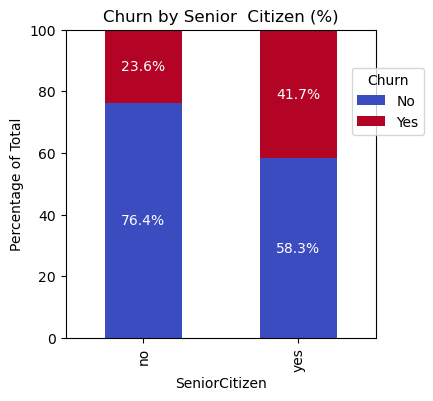

In [98]:
plt. figure
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert to % of total
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(4,4), colormap='coolwarm')

# Add % labels
for i, (idx, row) in enumerate(percentages.iterrows()):
    cumulative = 0
    for churn_val, value in row.items():
        ax.text(i, cumulative + (value / 2), f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10)
        cumulative += value

plt.title("Churn by Senior  Citizen (%)")
plt.ylabel("Percentage of Total")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn" ,bbox_to_anchor = (0.9,0.9)) # Customize Legend Location
plt.ylim(0, 100)
plt.show()

## From above analysis a greater percentage of people in senior citizen category have churned.

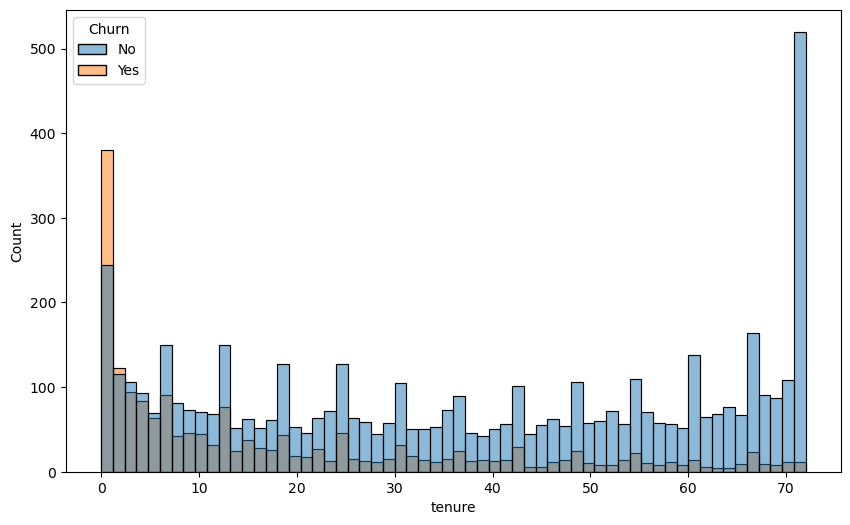

In [130]:
plt.figure(figsize =(10,6))
sns.histplot(x= "tenure",data = df,bins =60,hue = "Churn")
plt.show()

## People who have used our services for a long time have stayed and people who have used our services 

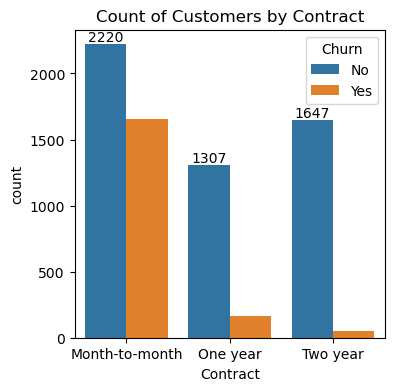

In [132]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x= "Contract",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()



In [ ]:
## People who have month to month contract are likely to churn than the people with 1 or 2 year contract.

In [141]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

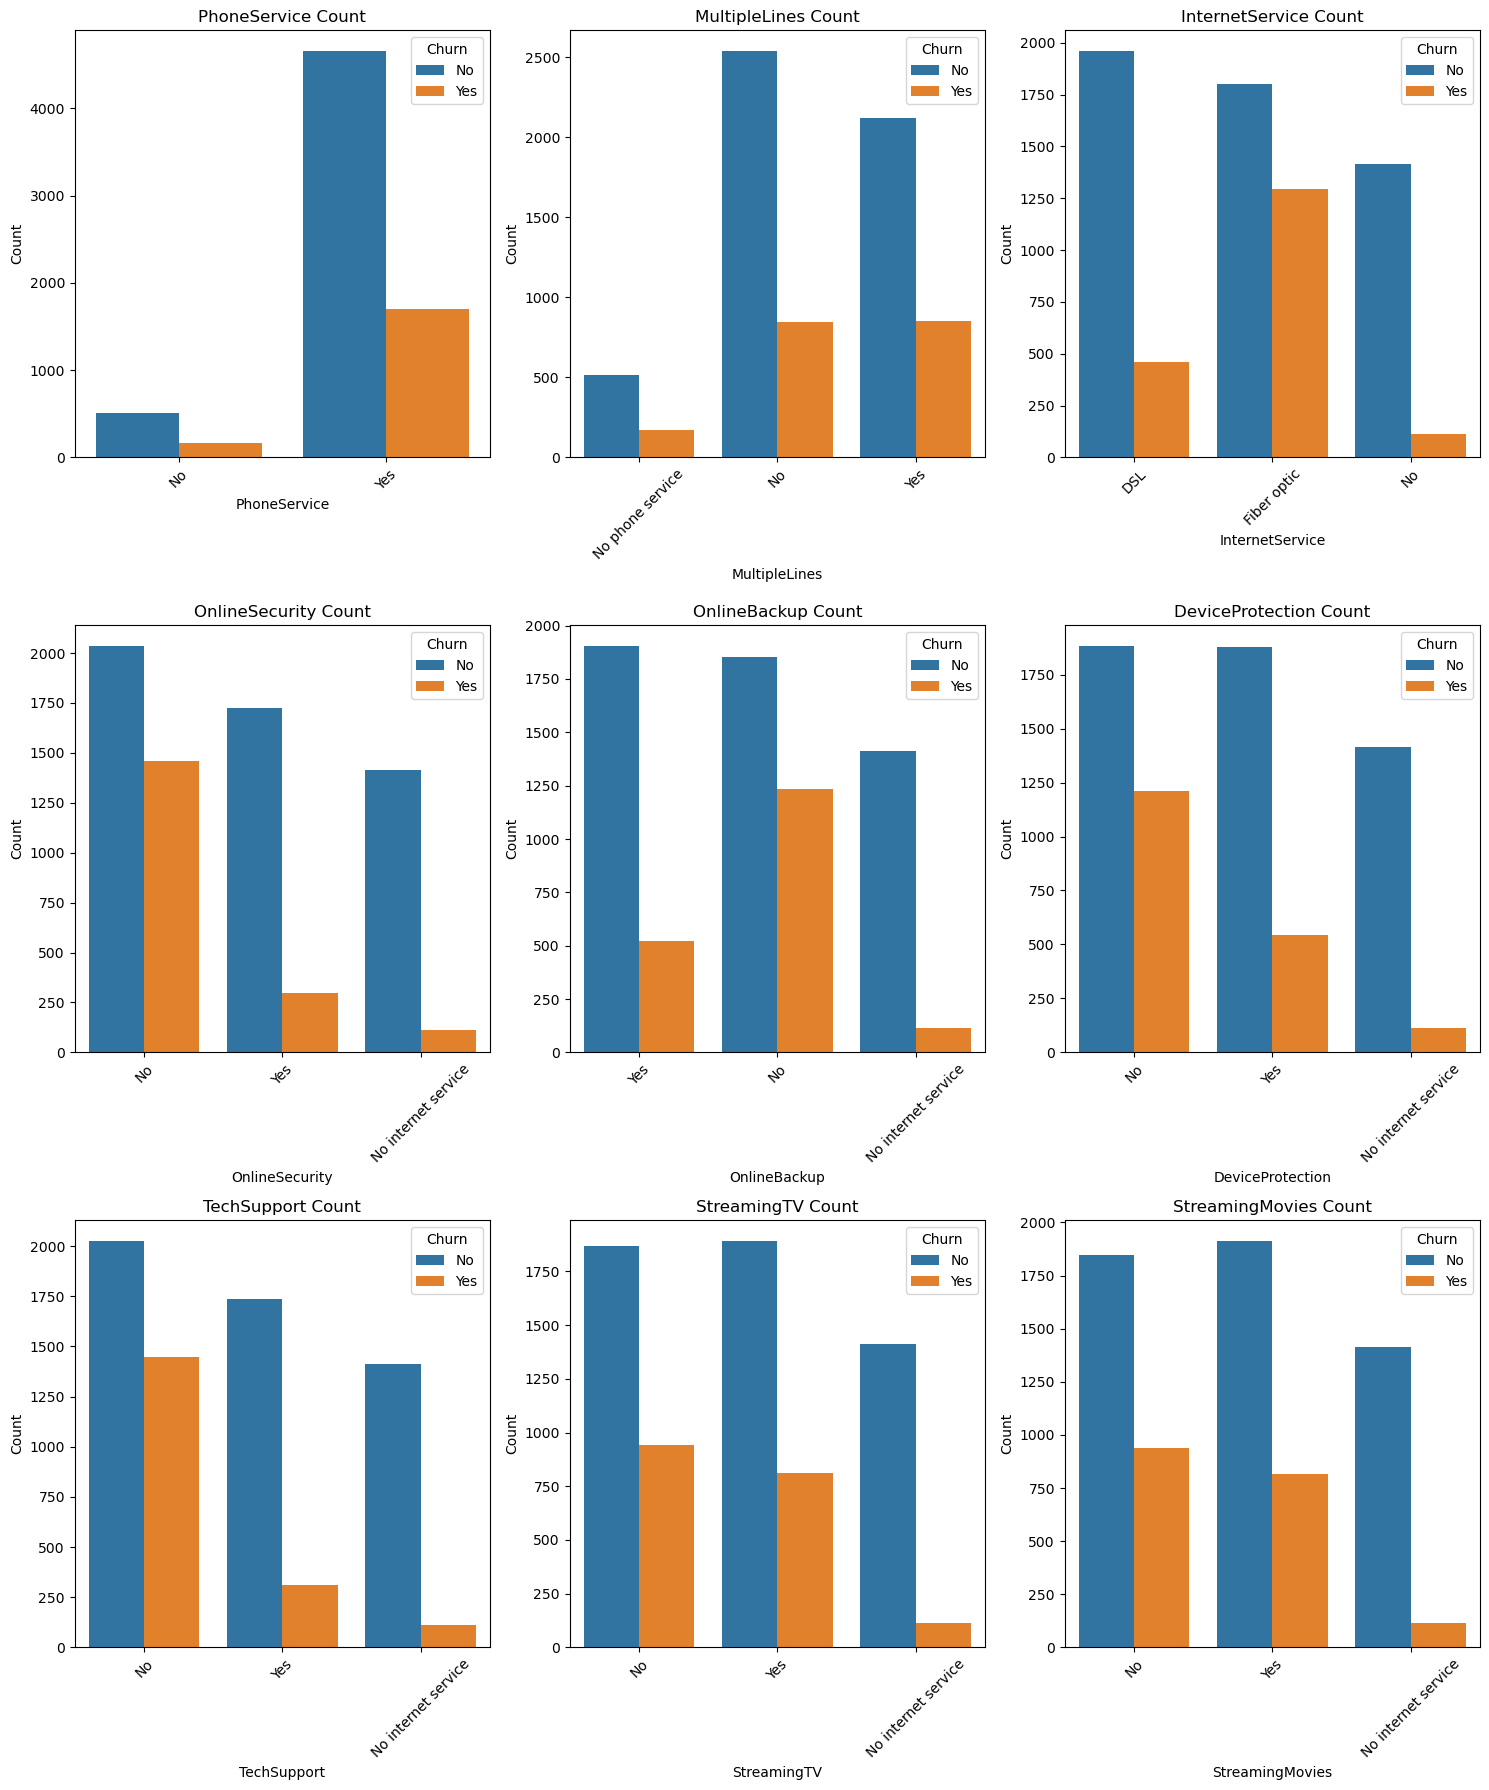

In [151]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid (3 columns layout)
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 6))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df,hue = "Churn")#palette='viridis')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


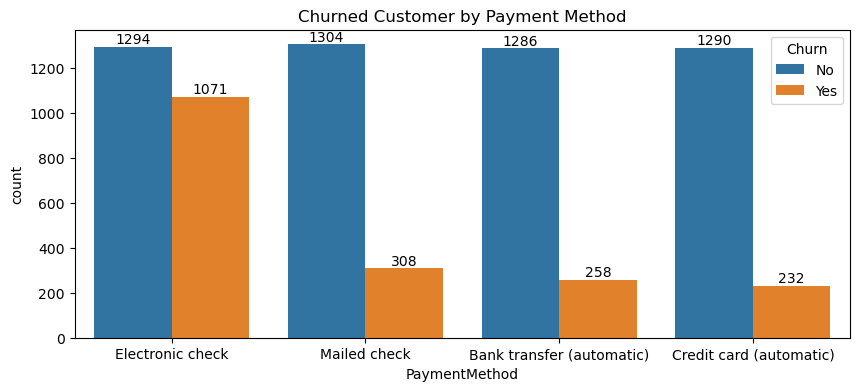

In [175]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x="PaymentMethod", data = df, hue ="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by Payment Method")
plt.xticks(rotation = 90) 
plt.show()